In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
from IPython.display import HTML
%config InlineBackend.figure_format = 'retina'

xr_df = xr.open_dataset('data/gistemp1200_GHCNv4_ERSSTv5.nc')

In [119]:
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1692)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2020-12-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-01-01
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-01-07 11:59:03 by SBBX_to_nc 2.0 - ILAND=1200,...

In [2]:
#Downsample the time series to yearly frequency.
climate = xr_df.resample(time='Y').mean()

anomaly = climate['tempanomaly']

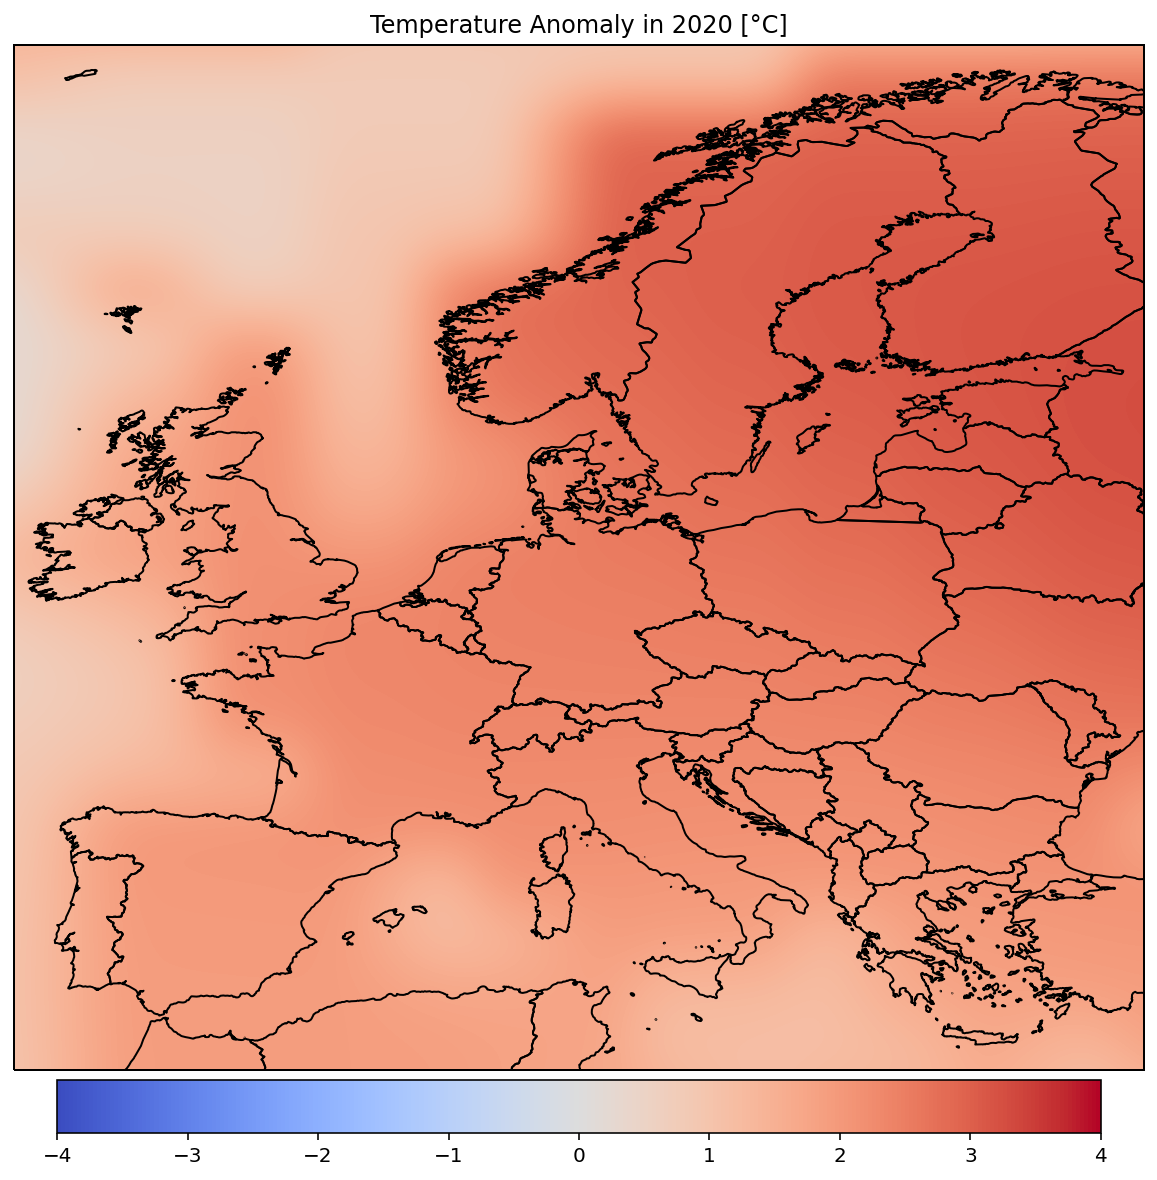

In [235]:
#Creating a static image of the european temperature anomaly for a given year.

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.show()


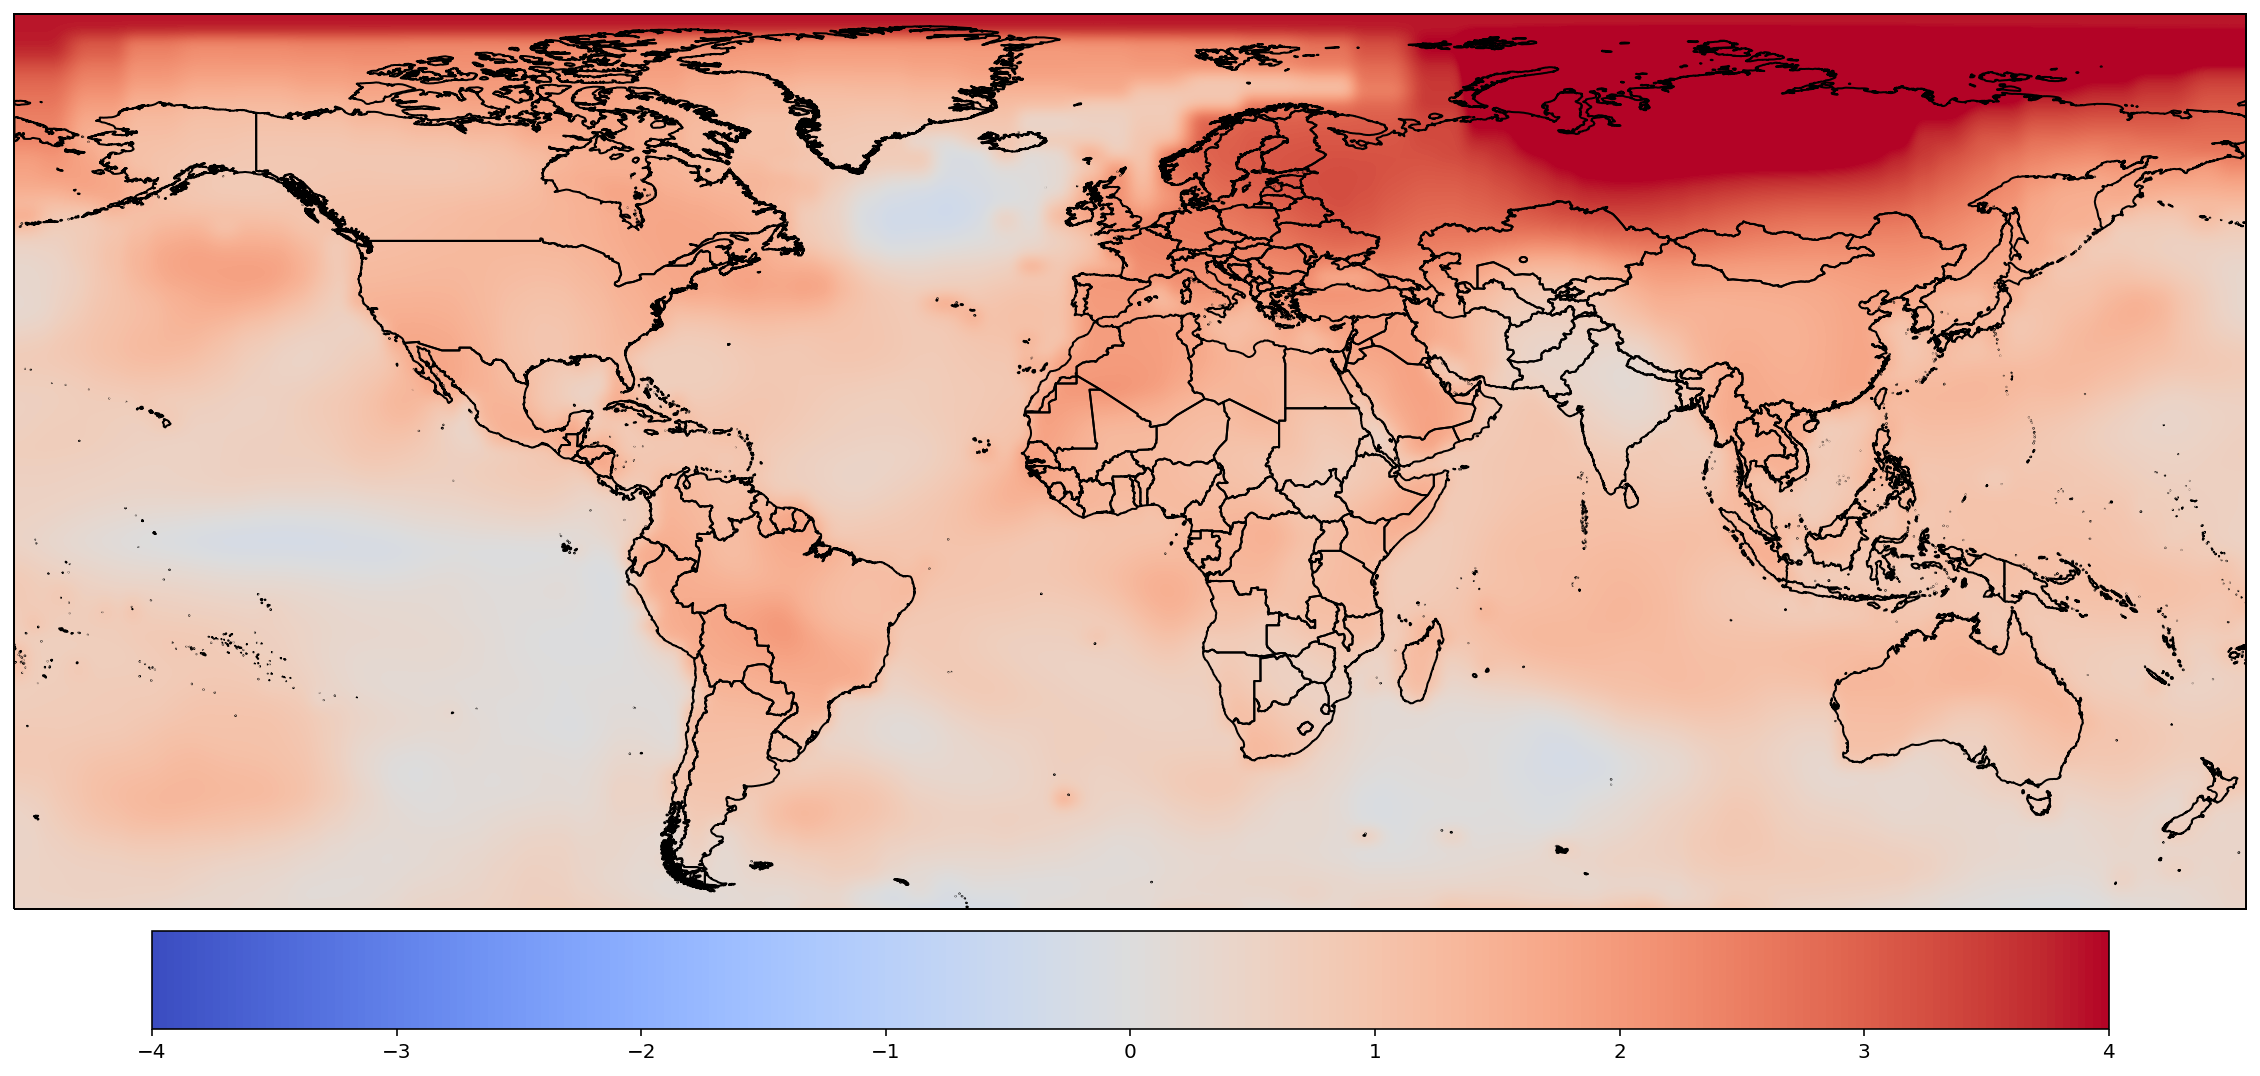

In [239]:
#Creating a static image of the global temperature anomaly for a given year.

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
#ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("blah.png", bbox_inches='tight', dpi=150)
plt.show()


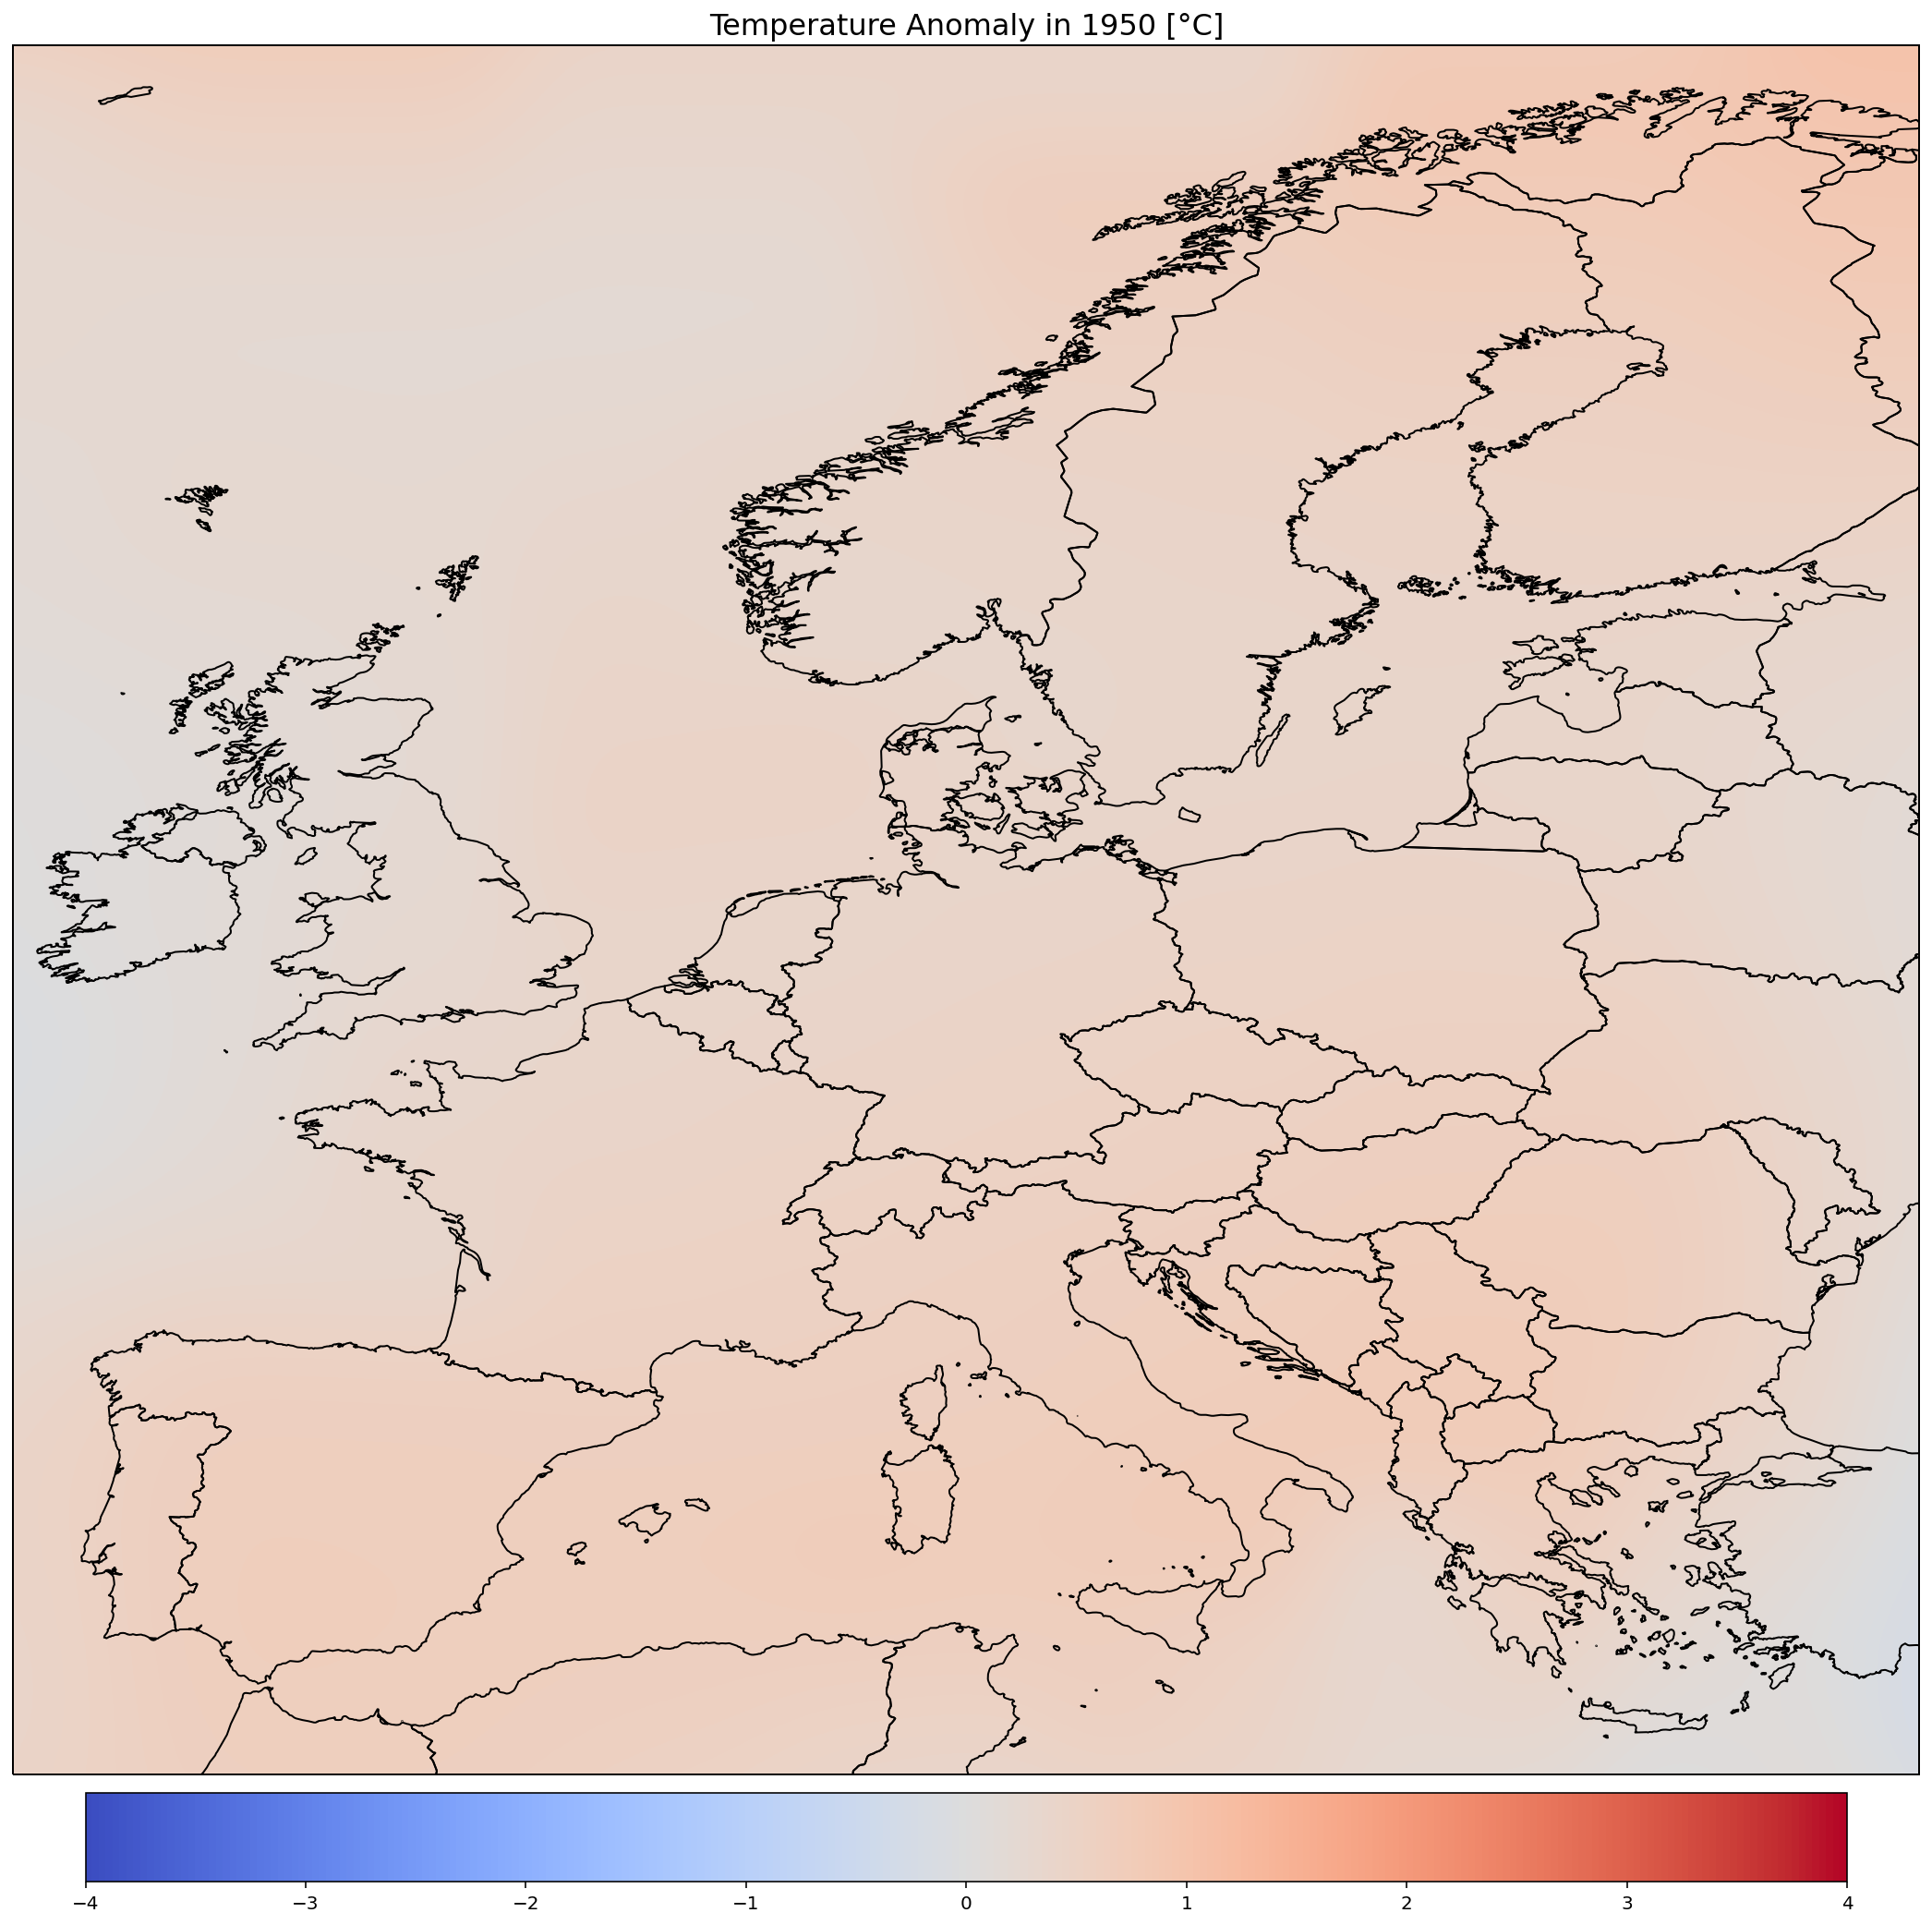

In [120]:
#Creating an animation for all years and saving it as an MP4 video.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96)
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False,
                       vmin=-4, vmax=4, cmap='coolwarm', animated=True,
                       cbar_kwargs=cbar_kwargs, interpolation='bicubic')

def animate(t):
    date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
    ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")
    ax.title.set_fontsize(16)
    image.set_array(anomaly.sel(time=t))
    return image

ani = FuncAnimation(fig, animate, frames=anomaly['time'].values[-71:], blit=False)
ani.save("blah.mp4", fps=2, extra_args=['-vcodec','libx264', '-crf','15', '-preset','veryslow'])
